<a href="https://colab.research.google.com/github/odoffin/Covid-EDA/blob/main/Covid_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> COVID Dataset Exploratory Data Analysis (EDA)
Portfolio Project



# COVID Dataset EDA

# COVID Dataset Exploratory Data Analysis (EDA) — Portfolio Project

This notebook explores COVID-19 vaccination and outcome data across age groups and weeks.  
It demonstrates data cleaning, aggregation, visualization, and key insights relevant for public health analysis.  

---

## 1️⃣ Dataset Overview

- **Rows:** 3,753  
- **Columns:** 21, including outcomes, vaccination rates, population, and age groups  
- **Data types:** mix of object, int, and float  
- **Missing values:** Some columns (e.g., Age-Adjusted rates) have missing data, which we handle as needed.  

**Takeaway:** Understanding the structure and missing data is crucial before any analysis.

---

## 2️⃣ Outcome Distribution

- Plotted total counts for each COVID outcome.  
- **Observation:** Certain outcomes dominate, which helps focus intervention efforts.  

---

## 3️⃣ Population and Vaccination by Age Group

- Aggregated total populations and calculated **unvaccinated, vaccinated, and boosted rates** per age group.  
- Visualized rates with bar charts including percentage labels.  

**Observation:**  
- Some age groups have low vaccination or booster coverage.  
- This highlights potential targets for public health campaigns.   

---

## 4️⃣ Outcomes by Vaccination Status

- Summed total outcomes by unvaccinated, vaccinated, and boosted groups.  
- Visualized differences using a bar chart.  

**Observation:**  
- Vaccinated and boosted groups consistently show **fewer negative outcomes**, illustrating vaccine effectiveness.  

---

## 5️⃣ Trends Over Time

- Converted “Week End” to datetime and calculated weekly mean rates.  
- Plotted temporal trends for unvaccinated, vaccinated, and boosted groups.  

**Observation:**  
- Trends show how outcomes evolve week by week and the protective effect of vaccination over time.  


---

## 6️⃣ Heatmap of Vaccination vs Outcomes

- Plotted a heatmap showing vaccination rates and outcomes per age group.  

**Observation:**  
- Quickly identifies age groups with **low vaccination rates and high outcomes**.  
- Reveals relationships not obvious in bar charts alone.  



---

## 7️⃣ Overall Portfolio Takeaways

- This analysis **covers the full EDA workflow**:  
  1. Data inspection and cleaning  
  2. Aggregation by age group  
  3. Calculation of meaningful rates and per-capita outcomes  
  4. Multiple visualization types: bar charts, heatmaps, scatter plots, time-series plots  
- Insights are **policy-relevant**:  
  - Identifies vulnerable age groups  
  - Demonstrates vaccine effectiveness  
  - Highlights temporal trends  

**Conclusion:**  
- This notebook showcases my Python data analysis skills, my ability to interpret and communicate insights clearly, and my proficiency in creating professional, publication-ready visualizations. It reflects my capability to carry out a complete exploratory analysis.


In [135]:
#Import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
#Load the dataset
covid = pd.read_csv('/content/drive/My Drive/Portfolio/Python/Covid.csv')

In [17]:
#This info is to understand the amount of rows and columsn in the dataset
covid.shape

(3753, 21)

In [19]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Outcome                         3753 non-null   object 
 1   Week End                        3753 non-null   object 
 2   Age Group                       3753 non-null   object 
 3   Unvaccinated Rate               3753 non-null   float64
 4   Vaccinated Rate                 3426 non-null   float64
 5   Boosted Rate                    2529 non-null   float64
 6   Crude Vaccinated Ratio          2320 non-null   float64
 7   Crude Boosted Ratio             1761 non-null   float64
 8   Age-Adjusted Unvaccinated Rate  417 non-null    float64
 9   Age-Adjusted Vaccinated Rate    417 non-null    float64
 10  Age-Adjusted Boosted Rate       330 non-null    float64
 11  Age-Adjusted Vaccinated Ratio   380 non-null    float64
 12  Age-Adjusted Boosted Ratio      31

In [21]:
#Looking at the first 5 rows to understand the data structure
covid.head(5)

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10/01/2022,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,02/04/2023,50-64,2.9,0.8,0.4,3.6,7.2,NaN,NaN,...,NaN,NaN,34169,125516.0,246849.0,1,1.0,1.0,50,64
2,Deaths,09/10/2022,5-11,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,95349,82126.0,17689.0,0,0.0,0.0,5,11
3,Deaths,11/20/2021,5-11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,166798,1.0,NaN,0,0.0,NaN,5,11
4,Deaths,04/09/2022,18-29,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,98229,219416.0,147442.0,0,0.0,0.0,18,29


In [22]:
#Check for the missing value in each column
covid.isna().sum()

,0
Outcome,0
Week End,0
Age Group,0
Unvaccinated Rate,0
Vaccinated Rate,327
Boosted Rate,1224
Crude Vaccinated Ratio,1433
Crude Boosted Ratio,1992
Age-Adjusted Unvaccinated Rate,3336
Age-Adjusted Vaccinated Rate,3336


# **Outcome Distribution**

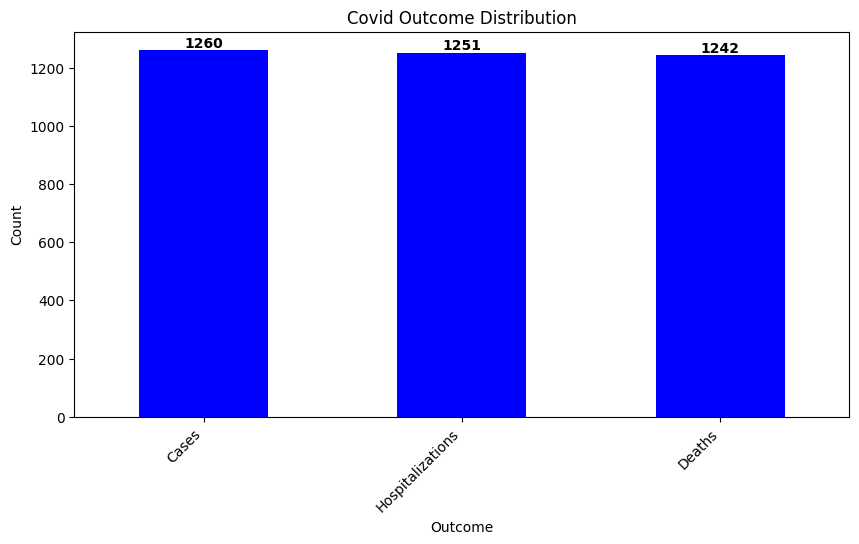

In [125]:
#Count the occurences of each outcome
outcome_dist = covid["Outcome"].value_counts()
outcome_dist

#Plotting the bar charts
ax = outcome_dist.plot(kind="bar", figsize=(10,5), color="blue")
plt.title("Covid Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability

# Add value labels on top of each bar
for p in ax.patches:  # ax.patches are the bars
    ax.annotate(
        str(p.get_height()),  # the value of the bar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # position
        ha="center", va="bottom", fontsize=10, color="black", fontweight="bold"
    )
plt.show()
#Insight: Quickly identify which outcomes dominate, highlighting where intervention may be needed.

# Population and Vaccination Rates by Age Group

In [129]:
# Group data by Age Group and sum populations
age_group_data = covid.groupby("Age Group").agg({
    "Population Unvaccinated": "sum",
    "Population Vaccinated": "sum",
    "Population Boosted": "sum"
})

# Calculate percentage rates for each vaccination status
age_group_data["Unvaccinated Rate"] = age_group_data["Population Unvaccinated"] / (
    age_group_data["Population Unvaccinated"] +
    age_group_data["Population Vaccinated"] +
    age_group_data["Population Boosted"]
) * 100

age_group_data["Vaccinated Rate"] = age_group_data["Population Vaccinated"] / (
    age_group_data["Population Unvaccinated"] +
    age_group_data["Population Vaccinated"] +
    age_group_data["Population Boosted"]
) * 100

age_group_data["Boosted Rate"] = age_group_data["Population Boosted"] / (
    age_group_data["Population Unvaccinated"] +
    age_group_data["Population Vaccinated"] +
    age_group_data["Population Boosted"]
) * 100

age_group_data

#Insight: Identify age groups with low vaccination or booster coverage for targeted strategies.


,Population Unvaccinated,Population Vaccinated,Population Boosted,Unvaccinated Rate,Vaccinated Rate,Boosted Rate
Age Group,,,,,,
0-4,67821714,0.0,0.0,100.000000,0.000000,0.000000
12-17,22109164,33829561.0,11810225.0,32.633958,49.933705,17.432337
18-29,50570186,93928573.0,47152166.0,26.386612,49.010237,24.603151
30-49,67258806,136148205.0,103390885.0,21.922838,44.377164,33.699998
5-11,52371441,24844048.0,4428597.0,64.146031,30.429697,5.424272
50-64,23623701,71117913.0,73443486.0,14.046251,42.285502,43.668248
65-79,21080969,33156169.0,52392102.0,19.770345,31.094819,49.134836
80+,11468912,8933738.0,14360779.0,32.991314,25.698667,41.310019
All,310710570,405104975.0,307022053.0,30.377312,39.605992,30.016696


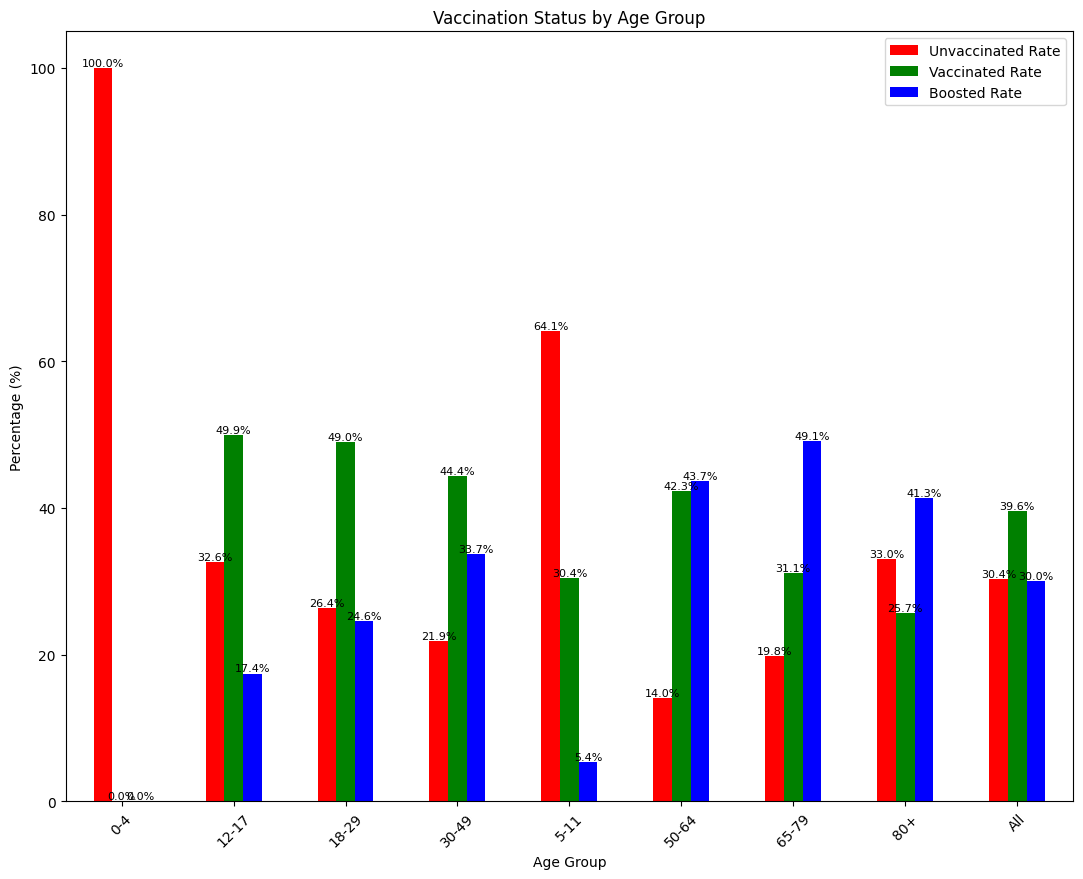

In [130]:
# Plot vaccination rates per age group
ax = age_group_data[["Unvaccinated Rate", "Vaccinated Rate", "Boosted Rate"]].plot(
    kind="bar", figsize=(13,10), color=["red","green","blue"]
)
plt.title("Vaccination Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=45)
plt.show()
#Insight: Visualizes coverage differences across age groups.

#Outcome by Vaccination Status

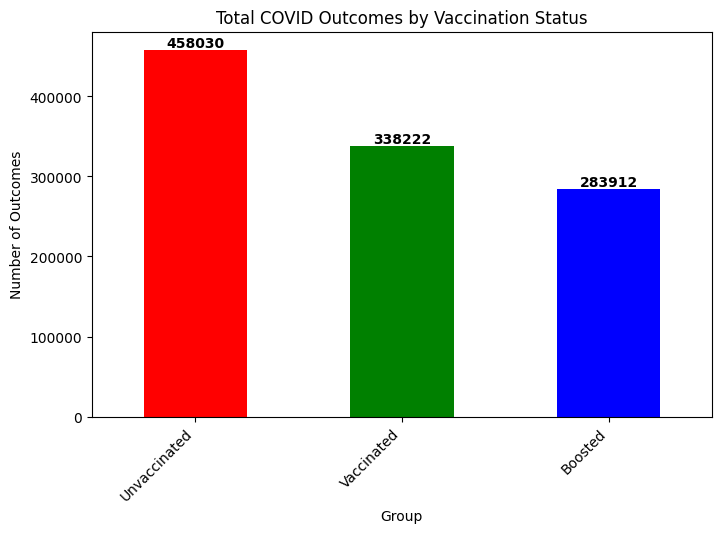

In [115]:
# Calculate total outcomes per vaccination status
outcome_comparison = {
    "Unvaccinated": covid["Outcome Unvaccinated"].sum(),
    "Vaccinated": covid["Outcome Vaccinated"].sum(),
    "Boosted": covid["Outcome Boosted"].sum()
}

outcome_comparison = pd.Series(outcome_comparison)

# Plot outcomes
ax = outcome_comparison.plot(kind="bar", figsize=(8,5), color=["red","green","blue"])
plt.title("Total COVID Outcomes by Vaccination Status")
plt.xlabel("Group")
plt.ylabel("Number of Outcomes")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()
#Insight: Demonstrates effectiveness of vaccination and boosters in reducing negative outcomes.

# Trend Overtime

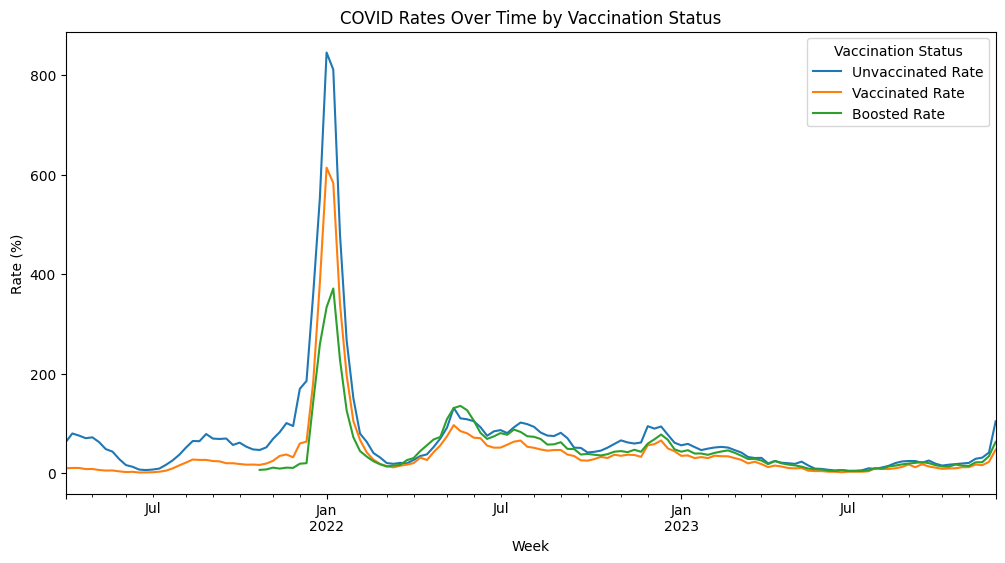

In [97]:
# Convert "Week End" to datetime
covid["Week End"] = pd.to_datetime(covid["Week End"])

# Calculate average rates per week
weekly_rates = covid.groupby("Week End")[["Unvaccinated Rate","Vaccinated Rate","Boosted Rate"]].mean()

# Plot trends over time
weekly_rates.plot(figsize=(12,6))
plt.title("COVID Rates Over Time by Vaccination Status")
plt.xlabel("Week")
plt.ylabel("Rate (%)")
plt.legend(title="Vaccination Status")
plt.show()
#Insight: Reveals temporal trends in outcomes, showing how vaccination status impacted rates over time.

# Heatmap of Vaccination vs Outcomes by Age Group

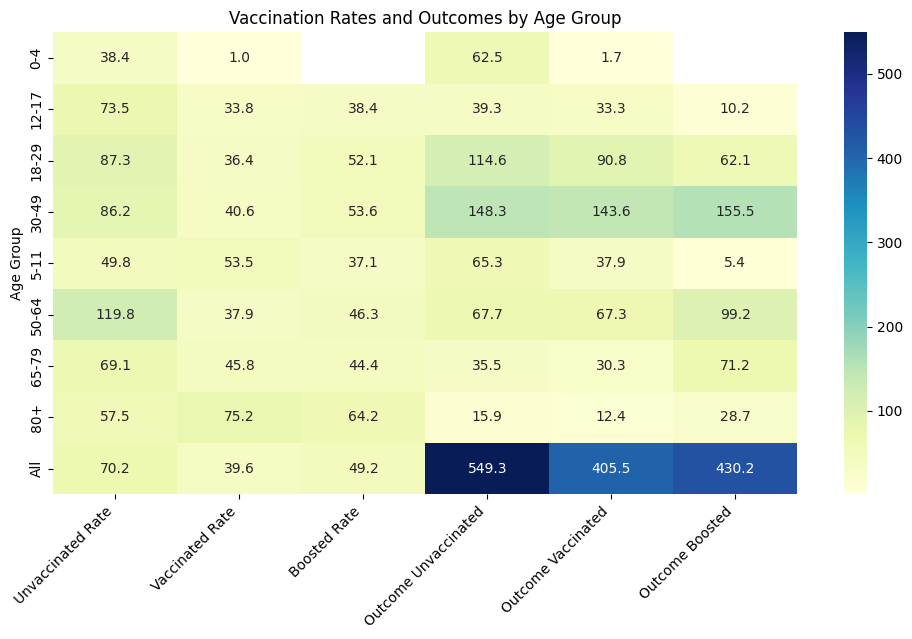

In [131]:
# Aggregate outcomes and vaccination rates by age group
heatmap_data = covid.groupby("Age Group")[["Unvaccinated Rate","Vaccinated Rate","Boosted Rate","Outcome Unvaccinated","Outcome Vaccinated","Outcome Boosted"]].mean()

# Plot a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Vaccination Rates and Outcomes by Age Group")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.show()
#Insight: Quickly visualizes relationships between vaccination rates and outcomes, highlighting vulnerable age groups.